In [3]:
import cv2
import numpy as np
from detection_inference_api import ObjectDetection

from PIL import Image
from matplotlib import pyplot as plt
import os

from utils import visualization_utils as vis_util
from utils import label_map_util

%matplotlib inline

In [3]:
# import sample 1 & 2
sample1 = []
sample2 = []
PATH_TO_SAMPLE_1 = "tracking_samples/sample_1"
PATH_TO_SAMPLE_2 = "tracking_samples/sample_2"

for i in range(1, 20):
    image_path = os.path.join(PATH_TO_SAMPLE_1, str(i)+".jpeg")
    image = Image.open(image_path)
    image.load()
    image_np = np.asarray(image, dtype = "int32")
    sample1.append(image_np)
    
for i in range(1, 12):
    image_path = os.path.join(PATH_TO_SAMPLE_2, str(i)+".jpeg")
    image = Image.open(image_path)
    image.load()
    image_np = np.asarray(image, dtype = "int32")
    sample2.append(image_np)

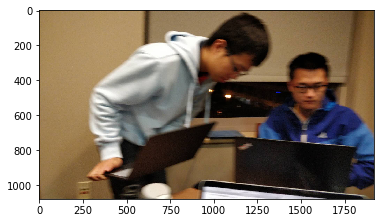

In [4]:
# Show one sample
n = 5
plt.imshow(sample1[n])

In [5]:
# Construct an object detector
detector = ObjectDetection()

# List of strings used to add correct label for each box
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')
NUM_CLASSES = 90
IMAGE_SIZE = (20, 16)

# Convert label format
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [6]:
# In sample1, apply detector to first image
output_dict = detector.detect_boundingbox_inference(sample1[0])

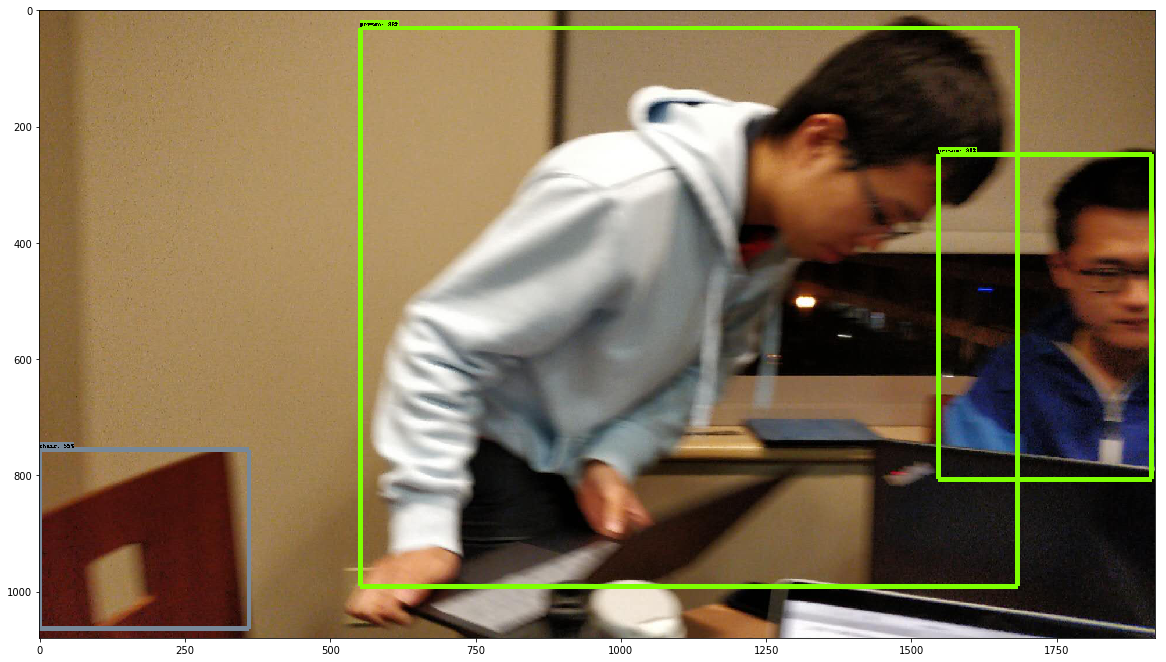

In [7]:
# Visualize the result
vis_util.visualize_boxes_and_labels_on_image_array(
      sample1[0],
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      None,
      use_normalized_coordinates=True,
      line_thickness=8)
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(sample1[0])

In [ ]:
# Convert output_dict to API format
detection_dict_init = detector.detect_boundingbox_convert(output_dict)
len(detection_dict_init)

# Tracking Part

In [9]:
tracker_type = 'TLD'
cv2.__file__

'/home/jinhuyinhu99513/.local/lib/python3.5/site-packages/cv2/cv2.cpython-35m-x86_64-linux-gnu.so'

In [10]:
import inspect
inspect.getfile(cv2)

'/home/jinhuyinhu99513/.local/lib/python3.5/site-packages/cv2/cv2.cpython-35m-x86_64-linux-gnu.so'